In [132]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# mouse_drug_data_to_load = "data/mouse_drug_data.csv"
# clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinicaltrial_data = os.path.join("data","clinicaltrial_data.csv")
mouse_drug_data = os.path.join("data","mouse_drug_data.csv")

clinicaltrial_data_df = pd.read_csv(clinicaltrial_data)
mouse_drug_data_df = pd.read_csv(mouse_drug_data)

# Combine the data into a single dataset
combined_clinical_df = pd.merge(clinicaltrial_data_df,mouse_drug_data_df,
                               how = 'outer', on = 'Mouse ID')

# Display the data table for preview
combined_clinical_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [133]:
list (combined_clinical_df.columns)
combined_clinical_df.dtypes

combined_clinical_df.describe()
combined_clinical_df[["Drug","Timepoint","Tumor Volume (mm3)"]].head()

count = combined_clinical_df["Drug"].value_counts()
print(type(count))
print(count)

combined_clinical_df.columns

len(combined_clinical_df["Drug"].unique())



<class 'pandas.core.series.Series'>
Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64


10

In [158]:
group_data = combined_clinical_df.groupby(['Drug','Timepoint'])
mean_drug = group_data["Tumor Volume (mm3)"].mean()
mean_drug_df = pd.DataFrame(mean_drug).reset_index()
print(mean_drug_df)


ste_drug = group_data['Tumor Volume (mm3)'].sem()
ste_drug_df_P = pd.DataFrame(ste_drug).reset_index()
ste_drug_df_final = ste_drug_df_P.rename(columns = {"Tumor Volume (mm3)":"Standard Error"})

print(ste_drug_df_final)




         Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
..        ...        ...                 ...
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]
         Drug  Timepoint  Standard Error
0   Capomulin          0        0.000000
1   Capomulin          5        0.448593
2   Capomulin         10        0.702684
3   Capomulin         15        0.838617
4   Capomulin         20        0.909731
..        ...        ...             ...
95  Zoniferol         25        0.602513
96  Zoniferol         30        0.800043
97  Zoniferol         35        0.881426
98  Zoniferol         40  

## Tumor Response to Treatment

In [135]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame


# Preview DataFrame

# print(group_data_mean.head())


In [136]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# Convert to DataFrame

# Preview DataFrame
# print(group_data_sem


In [137]:
# Minor Data Munging to Re-Format the Data Frames
mean_drug_df_reft = mean_drug_df.pivot (index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")


# Preview that Reformatting worked
mean_drug_df_reft.head(50)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


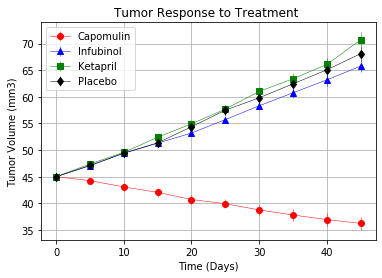

In [218]:
# Generate the Plot (with Error Bars)
x_axis = mean_drug_df["Timepoint"].unique()



capo_error = ste_drug_df_final.loc[ste_drug_df_final["Drug"] == "Capomulin","Standard Error"]
plt.errorbar(x_axis, mean_drug_df_reft["Capomulin"],
            yerr = capo_error,color = "red",marker = "o",linewidth = 0.5,label = "Capomulin" )


infu_error = ste_drug_df_final.loc[ste_drug_df_final["Drug"] == "Infubinol","Standard Error"]
plt.errorbar(x_axis, mean_drug_df_reft["Infubinol"],
            yerr = infu_error,color = "blue",marker = "^",linewidth = 0.5, label = "Infubinol" )


keta_error = ste_drug_df_final.loc[ste_drug_df_final["Drug"] == "Ketapril","Standard Error"]
plt.errorbar(x_axis, mean_drug_df_reft["Ketapril"],
            yerr = keta_error,color = "green",marker = "s",linewidth = 0.5, label = "Ketapril" )



plac_error = ste_drug_df_final.loc[ste_drug_df_final["Drug"] == "Placebo","Standard Error"]
plt.errorbar(x_axis, mean_drug_df_reft["Placebo"],
            yerr = plac_error,color = "black",marker = "d",linewidth = 0.5, label="Placebo" )


plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")



plt.legend(loc="best")

plt.grid()





# Save the Figure

plt.savefig("../Images/Tumor Response to Treatment ")

In [139]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [140]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [163]:
# group_data = combined_clinical_df.groupby(['Drug','Timepoint'])


mean_meta = group_data["Metastatic Sites"].mean()
mean_meta_df = pd.DataFrame(mean_meta).reset_index()
print(mean_meta_df)


ste_meta = group_data['Metastatic Sites'].sem()
ste_meta_df_P = pd.DataFrame(ste_meta).reset_index()
ste_meta_df_final = ste_meta_df_P.rename(columns = {"Metastatic Sites":"Standard Error"})

print(ste_meta_df_final)

         Drug  Timepoint  Metastatic Sites
0   Capomulin          0          0.000000
1   Capomulin          5          0.160000
2   Capomulin         10          0.320000
3   Capomulin         15          0.375000
4   Capomulin         20          0.652174
..        ...        ...               ...
95  Zoniferol         25          1.687500
96  Zoniferol         30          1.933333
97  Zoniferol         35          2.285714
98  Zoniferol         40          2.785714
99  Zoniferol         45          3.071429

[100 rows x 3 columns]
         Drug  Timepoint  Standard Error
0   Capomulin          0        0.000000
1   Capomulin          5        0.074833
2   Capomulin         10        0.125433
3   Capomulin         15        0.132048
4   Capomulin         20        0.161621
..        ...        ...             ...
95  Zoniferol         25        0.236621
96  Zoniferol         30        0.248168
97  Zoniferol         35        0.285714
98  Zoniferol         40        0.299791
99  Zonif

In [164]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [165]:
# Minor Data Munging to Re-Format the Data Frames
mean_meta_df_reft = mean_meta_df.pivot (index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
mean_meta_df_reft

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


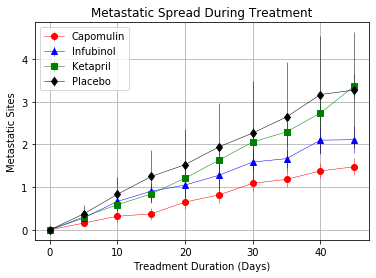

In [219]:
# Generate the Plot (with Error Bars)
x_axis = mean_meta_df["Timepoint"].unique()



capo_error_meta = ste_meta_df_final.loc[ste_meta_df_final["Drug"] == "Capomulin","Standard Error"]
plt.errorbar(x_axis, mean_meta_df_reft["Capomulin"],
            yerr = capo_error_meta,color = "red",marker = "o",linewidth = 0.5,label = "Capomulin" )


infu_error_meta = ste_meta_df_final.loc[ste_meta_df_final["Drug"] == "Infubinol","Standard Error"]
plt.errorbar(x_axis, mean_meta_df_reft["Infubinol"],
            yerr = infu_error_meta,color = "blue",marker = "^",linewidth = 0.5, label = "Infubinol" )


keta_error_meta = ste_meta_df_final.loc[ste_meta_df_final["Drug"] == "Ketapril","Standard Error"]
plt.errorbar(x_axis, mean_meta_df_reft["Ketapril"],
            yerr = keta_error_meta,color = "green",marker = "s",linewidth = 0.5, label = "Ketapril" )



plac_error_meta = ste_meta_df_final.loc[ste_meta_df_final["Drug"] == "Placebo","Standard Error"]
plt.errorbar(x_axis, mean_meta_df_reft["Placebo"],
            yerr = plac_error,color = "black",marker = "d",linewidth = 0.5, label="Placebo" )


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treadment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.legend(loc="best")


plt.grid()

# Save the Figure
plt.savefig("../Images/Metastatic Spread During Treatment")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [193]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [200]:
count_surv = group_data["Mouse ID"].count()
count_surv_df = pd.DataFrame(count_surv).reset_index()


count_surv_df_final = count_surv_df. rename(columns = {"Mouse ID":"surv count"})
print(count_surv_df_final)




         Drug  Timepoint  surv count
0   Capomulin          0          25
1   Capomulin          5          25
2   Capomulin         10          25
3   Capomulin         15          24
4   Capomulin         20          23
..        ...        ...         ...
95  Zoniferol         25          16
96  Zoniferol         30          15
97  Zoniferol         35          14
98  Zoniferol         40          14
99  Zoniferol         45          14

[100 rows x 3 columns]


In [203]:
# Minor Data Munging to Re-Format the Data Frames
count_surv_fort = count_surv_df_final.pivot(index = "Timepoint", columns ="Drug", values = "surv count") 
# Preview the Data Frame
count_surv_fort

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


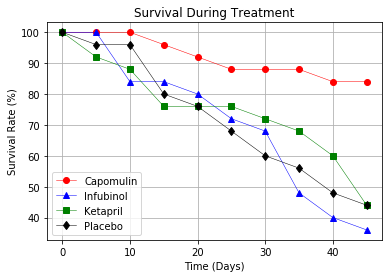

In [214]:
# Generate the Plot (Accounting for percentages)
x_axis = mean_meta_df["Timepoint"].unique()




plt.errorbar(x_axis, count_surv_fort["Capomulin"]/max(count_surv_fort["Capomulin"]) *100,
            color = "red",marker = "o",linewidth = 0.5,label = "Capomulin" )

plt.errorbar(x_axis, count_surv_fort["Infubinol"]/max(count_surv_fort["Infubinol"])*100,
            color = "blue",marker = "^",linewidth = 0.5, label = "Infubinol" )

plt.errorbar(x_axis, count_surv_fort["Ketapril"]/max(count_surv_fort["Ketapril"])*100,
            color = "green",marker = "s",linewidth = 0.5, label = "Ketapril" )

plt.errorbar(x_axis, count_surv_fort["Placebo"]/max(count_surv_fort["Placebo"])*100,
            color = "black",marker = "d",linewidth = 0.5, label="Placebo" )


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.grid()
# Save the Figure
plt.savefig("../Images/Survival_During_Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [76]:
# Calculate the percent changes for each drug
begin_t = mean_drug_df_reft.loc[0,:]
final_t = mean_drug_df_reft.loc[45,:]
change_t =  round ((final_t - begin_t) / (final_t) * 100,2)


type(final_t)
change_t
# Display the data to confirm


Drug
Capomulin   -24.19
Ceftamin     29.83
Infubinol    31.56
Ketapril     36.32
Naftisol     35.03
Placebo      33.91
Propriva     32.08
Ramicane    -28.73
Stelasyn     34.25
Zoniferol    31.78
dtype: float64

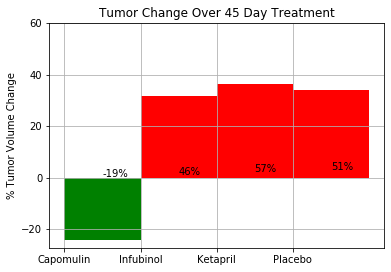

In [232]:
# Store all Relevant Percent Changes into a Tuple
change_tuple = (change_t["Capomulin"],change_t["Infubinol"],change_t["Ketapril"],change_t["Placebo"])
change_tuple

# Splice the data between passing and failing drugs
passing_drug = []
failing_drug = []
 
for percent in change_tuple:
    if percent > 0 :
        passing_drug.append(percent)
    else:
        failing_drug.append(percent)

# print(passing_drug)
# print(failing_drug)

# Orient widths. Add labels, tick marks, etc. 
x_axis_f = [0];
x_axis_p = [1,2,3]
plt.bar(x_axis_f,failing_drug,color = "green",width = 1, align = "edge")
plt.bar(x_axis_p,passing_drug,color = "red",width = 1, align = "edge")

tick=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.xticks(x_axis_f + x_axis_p, tick)
plt.yticks([-20, 0, 20, 40, 60])


plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()


# Use functions to label the percentages of changes
full_x = x_axis_f+x_axis_p
full_label = ['-19%','46%','57%','51%']
for i in range(len(full_x)):
   plt.text(x = full_x[i]+0.5 ,y = full_x[i]+0.1,  s = full_label[i], size =10)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 




# Call functions to implement the function calls


# Save the Figure
plt.savefig("../Images/Tumor Change Over 45 Day Treatment.png")

# Show the Figure
# fig.show()

![Metastatic Spread During Treatment](../Images/change.png)